In [4]:
from google.colab import files
uploaded = files.upload()

Saving student_performance.csv to student_performance.csv


In [5]:
'''
Este notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:
- A relação entre horas de estudo, presença e participação com a nota final.
- A performance de modelos de regressão para prever notas.
- A performance de modelos de classificação para prever a *grade* (A–F).

---
'''



'\nEste notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:\n- A relação entre horas de estudo, presença e participação com a nota final.\n- A performance de modelos de regressão para prever notas.\n- A performance de modelos de classificação para prever a *grade* (A–F).\n\n---\n'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv("student_performance.csv")

print("Tamanho do dataset:", df.shape)
df.head()


Tamanho do dataset: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


           student_id  weekly_self_study_hours  attendance_percentage  \
count  1000000.000000           1000000.000000         1000000.000000   
mean    500000.500000                15.029127              84.711046   
std     288675.278933                 6.899431               9.424143   
min          1.000000                 0.000000              50.000000   
25%     250000.750000                10.300000              78.300000   
50%     500000.500000                15.000000              85.000000   
75%     750000.250000                19.700000              91.800000   
max    1000000.000000                40.000000             100.000000   

       class_participation     total_score  
count       1000000.000000  1000000.000000  
mean              5.985203       84.283845  
std               1.956421       15.432969  
min               0.000000        9.400000  
25%               4.700000       73.900000  
50%               6.000000       87.500000  
75%               7.300000 

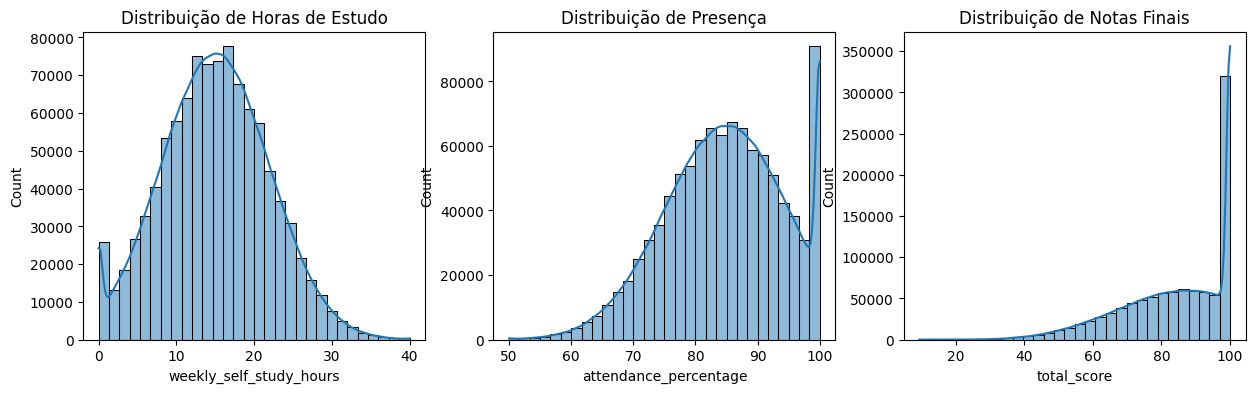

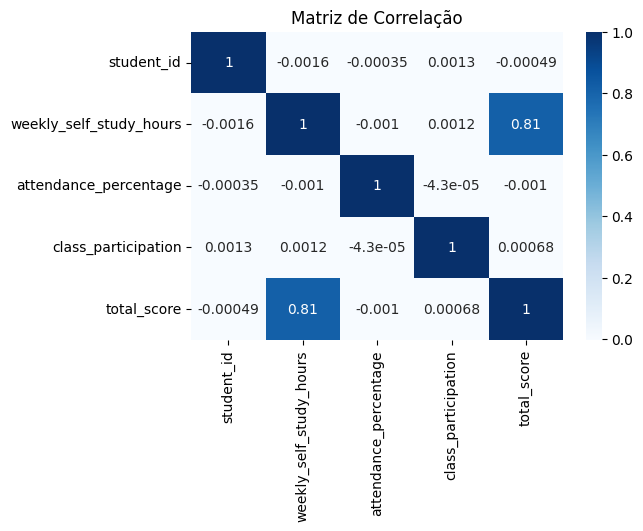

In [8]:
print(df.describe())

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['weekly_self_study_hours'], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Distribuição de Horas de Estudo")

sns.histplot(df['attendance_percentage'], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Distribuição de Presença")

sns.histplot(df['total_score'], bins=30, kde=True, ax=axs[2])
axs[2].set_title("Distribuição de Notas Finais")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()



--- Regressão Linear Simples ---
MAE: 7.161324064837911
RMSE: 80.93499659297578
R²: 0.6600435613904074


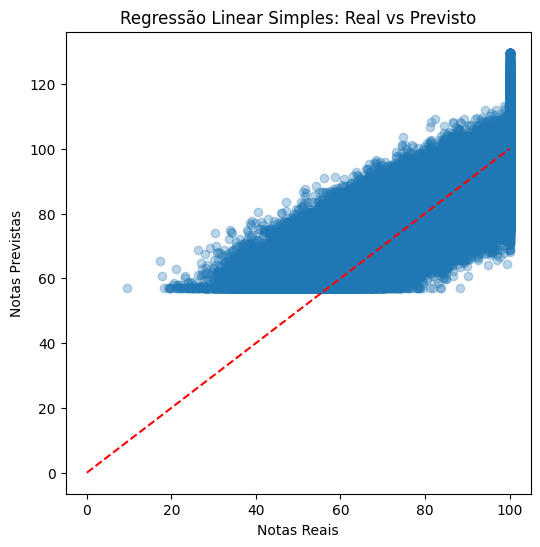


--- Regressão Linear Múltipla ---
MAE: 7.161333476729997
RMSE: 80.9352286743695
R²: 0.6600425865640975
Coeficientes: {'weekly_self_study_hours': np.float64(1.8168200275583486), 'attendance_percentage': np.float64(0.00040175074313641935), 'class_participation': np.float64(-0.002755620936487001)}


In [10]:
X_simple = df[['weekly_self_study_hours']]
y = df['total_score']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("\n--- Regressão Linear Simples ---")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Notas Reais")
plt.ylabel("Notas Previstas")
plt.title("Regressão Linear Simples: Real vs Previsto")
plt.plot([0,100],[0,100],'r--')
plt.show()

X_multi = df[['weekly_self_study_hours','attendance_percentage','class_participation']]
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)
y_pred_multi = lin_reg_multi.predict(X_test)

print("\n--- Regressão Linear Múltipla ---")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("RMSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))
print("Coeficientes:", dict(zip(X_multi.columns, lin_reg_multi.coef_)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Acurácia: 0.692045

Matriz de Confusão:
 [[97973 11241   671     3     0]
 [19808 24919  6564   265     0]
 [ 2054 11757 12118  2451     0]
 [   38  1119  4371  3399     0]
 [    0    25   346   878     0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Relatório de Classificação:
               precision    recall  f1-score   support

           A       0.82      0.89      0.85    109888
           B       0.51      0.48      0.50     51556
           C       0.50      0.43      0.46     28380
           D       0.49      0.38      0.43      8927
           F       0.00      0.00      0.00      1249

    accuracy                           0.69    200000
   macro avg       0.46      0.44      0.45    200000
weighted avg       0.67      0.69      0.68    200000


--- Random Forest ---
Acurácia: 0.645125

Matriz de Confusão:
 [[91963 15400  2412   111     2]
 [19010 22362  9116  1031    37]
 [ 2961 10293 11748  3148   230]
 [  138  1312  4303  2866   308]
 [    1    68   501   593    86]]

Relatório de Classificação:
               precision    recall  f1-score   support

           A       0.81      0.84      0.82    109888
           B       0.45      0.43      0.44     51556
           C       0.42      0.41      0.42     28380
    

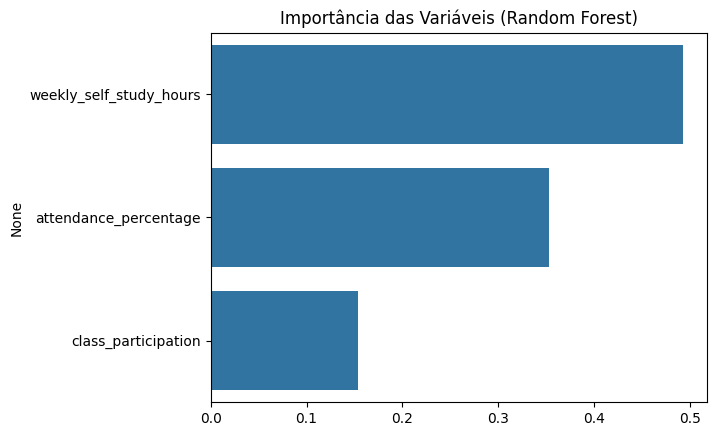

In [11]:
X = X_multi
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\n--- Logistic Regression ---")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Importância das Variáveis (Random Forest)")
plt.show()


In [13]:
print("""
 Conclusões:
- A regressão mostrou que 'horas de estudo' é o fator mais determinante na nota final.
- Presença e participação têm pouco impacto adicional na previsão.
- A regressão múltipla não trouxe ganho expressivo em relação à simples.
- Para classificação de notas (A-F), Logistic Regression e Random Forest tiveram ~65–70% de acurácia.
- Random Forest destacou que 'horas de estudo' é a variável mais importante, seguida por presença.
  Em resumo: estudar mais horas é o principal fator para melhor desempenho dos alunos.
""")



 Conclusões:
- A regressão mostrou que 'horas de estudo' é o fator mais determinante na nota final.
- Presença e participação têm pouco impacto adicional na previsão.
- A regressão múltipla não trouxe ganho expressivo em relação à simples.
- Para classificação de notas (A-F), Logistic Regression e Random Forest tiveram ~65–70% de acurácia.
- Random Forest destacou que 'horas de estudo' é a variável mais importante, seguida por presença.
  Em resumo: estudar mais horas é o principal fator para melhor desempenho dos alunos.

